<div style="text-align: right"> 29.11.2019</div>

***Name:*** 

# Hausaufgabe Blatt 6

## Mathematisches Pendel

In dieser Aufgabe werden wir die Bewegungsgleichung eines (mathematischen) Pendels numerisch lösen. Die Bewegungsgleichung eines Pendels (ohne Kleinwinkelnäherung) lautet:

\begin{equation*}
       \ddot{\varphi} = -\frac{g}{L} \sin \varphi 
\end{equation*}

Um diese Gleichung numerisch lösen zu können, werden wir die gegeben Differentialgleichung zweiter Ordnung in zwei Differentialgleichungen erster Ordnung überführen:

\begin{align*}
        \dot \varphi &= \omega \tag{1}\\
        \dot \omega &= -\frac{g}{L} \sin  \varphi.  \tag{2}
\end{align*}

Bevor wir die Gleichungen (1) und (2) lösen können, müssen wir diese diskretisieren. Wie auf Aufgabenblatt 3 werden wir dazu das Euler Verfahren benutzen. Hier wird die Ableitung nach der Zeit durch kleine diskrete Änderungen in der Zeit $\Delta t$ approximiert. 

\begin{align*}
\dot \varphi &= \frac{\mathrm{d}\varphi}{\mathrm{d}t}\approx \frac{\Delta \varphi}{\Delta t} \\
\dot \omega &= \frac{\mathrm{d}\omega}{\mathrm{d}t}\approx \frac{\Delta \omega}{\Delta t} \\
\end{align*}

Umstellen der Gleichungen führt zu:
\begin{align*}
\Delta \varphi &= \omega \cdot \Delta t \\
\Delta \omega &= -\frac{g}{L} \sin  \varphi \cdot \Delta t.\\
\end{align*}

Dies sind die diskreten Änderungen im Winkel $\Delta \varphi$ und der Winkelgeschwindigkeit $\Delta \omega$ in nach einem Zeitschritt $\Delta t$.

Um also den neuen Winkel $\varphi\left(t+\Delta t\right)$ zum Zeitpunkt $t+\Delta t$ berechnen zu können, muss man lediglich die diskrete Änderung $\Delta \varphi$ auf den alten Winkel $\varphi\left(t\right)$ zum Zeitpunkt $t$ addieren (auch *update step* genannt). Gleiches gilt auch für die Winkelgeschwindigkeit $\omega$. Man erhält die nach dem Euler Verfahren diskretisierten Gleichungen:

\begin{align*}
    \varphi \left(t + \Delta t\right) &=\varphi\left(t \right) + \omega\left(t\right) \cdot \Delta t \tag{3}  \\
    \omega \left(t+\Delta t\right) &= \omega \left(t\right) -\frac{g}{L} \sin  \varphi \left(t\right) \cdot \Delta t  \tag{4}
\end{align*}

Wie Sie hier erkennen können, hängt die rechte Seite der obigen Gleichungen lediglich von $t$ (alter Zeitpunkt) und nicht von $t+\Delta t$ (neuer Zeitpunkt) ab.
### 1. Numerische Integration
**a)** Integrieren Sie die Pendelgleichungen (3 + 4) numerisch für $N=3000$ Zeitschritte, wobei $\Delta t=0.002$, $\omega(t=0)=0$ und $ \varphi_0 = \varphi(t=0)=\pi/4 $ sein soll. Wählen Sie für die Länge des Pendels $L=1$ und $g$ sei die Erdbeschleunigung.  

Beachten Sie, dass Sie dafür von `numpy` folgende Methoden benötigen: `np.pi`, `np.cos()`, `np.sin()`

In [1]:
import numpy as np

dt=0.002
g=9.81
l=1
n=3000
phi=np.pi/4
phi_t1=np.array([phi])
phi_t2=np.array([phi])
w=0
w_t1=np.array([w])


for i in range (0,n):
    phinew=phi+w*dt
    wnew=w-(g/l)*np.sin(phi)*dt
    
    phi=phinew
    w=wnew
    phi_t1=np.append(phi,phi_t1)
    w_t1=np.append(w,w_t1)
phi_t=np.flip(phi_t1,0)
w_t=np.flip(w_t1,0)




**b)** Plotten Sie den Winkel des Pendels abhängig von der Zeit. Vergleichen Sie das Ergebnis mit der analytischen Lösung durch Kleinwinkelnäherung:

\begin{equation*}
\varphi\left(t\right) = \varphi_0 \cos \left( \sqrt{(g/L)} \cdot t \right).
\end{equation*}


Benutzen Sie angemessene Beschriftungen und Legenden. Was fällt Ihnen beim Vergleich auf?

*Tipp:* Benutzen Sie zum Erstellen des Zeit arrays anstelle von `np.linspace()` dieses mal `np.arange(start, stop, width)`. Dabei wird ein array mit den Grenzen `[start, stop)` erstellt und der Abstand zwischen zwei konsekutiven Werten ist durch `width` gegeben.


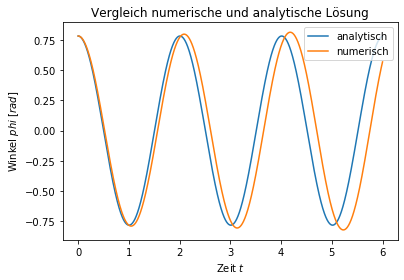

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

phi0=np.pi/4
g=9.81
l=1
t=np.arange(0,n*dt+dt,dt)
phiAnalytic=phi0*np.cos(math.sqrt(g/l)*t)

fig, ax = plt.subplots()
ax.set_title("Vergleich numerische und analytische Lösung")
ax.plot(t,phiAnalytic, label="analytisch")
ax.plot(t,phi_t,label= "numerisch")
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Winkel $phi$ $[rad]$")
plt.legend(loc=1)

Mir fällt beim Vergleich auf: Zu Beginn ist die numerische Lösung sehr genau. Nach der ersten Periode sieht man bereits leichte Abweichungen der numerischen Lösung von der analytischen, die Phasenverschiebung wird mit der Zeit immer größer.
Außerdem fällt auf, dass die maximale Auslenkung gleich dem Startwert pi/4 ist.

**c)** Wiederholen Sie die Schritte **a)** und **b)** für $\varphi_0 = \pi/16.$ Was beobachten Sie?

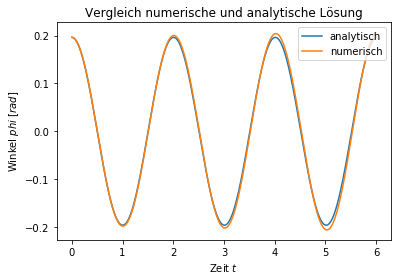

In [5]:
import numpy as np

dt=0.002
g=9.81
l=1
n=3000
phi=np.pi/16
phi_t1=np.array([phi])
w=0
w_t1=np.array([w])

for i in range (0,n):
    phinew=phi+w*dt
    wnew=w-(g/l)*np.sin(phi)*dt
    
    phi=phinew
    w=wnew
    phi_t1=np.append(phi,phi_t1)
    w_t1=np.append(w,w_t1)
phi_t=np.flip(phi_t1,0)
w_t=np.flip(w_t1,0)

import numpy as np
import matplotlib.pyplot as plt
import math

phi0=np.pi/16
g=9.81
l=1
t=np.arange(0,n*dt+dt,dt)
phiAnalytic=phi0*np.cos(math.sqrt(g/l)*t)

fig, ax = plt.subplots()
ax.set_title("Vergleich numerische und analytische Lösung")
ax.plot(t,phiAnalytic, label="analytisch")
ax.plot(t,phi_t,label= "numerisch")
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Winkel $phi$ $[rad]$")
plt.legend(loc=1)

Ich beobachte: Es ist nun praktisch keine Abweichung der numerischen Lösung von der analytischen zu erkennen. 
Außerdem ist die maximale Auslenkung nun dem neuen Startwert entsprechend bei pi/16. Das Euler-Verfahren ist also bei kleinen Pendelbewegungen eine sehr genaue Approximation, bei steigendem Startwinkel bzw. steigender Amplitude wird es jedoch immer ungenauer.